# Practical session: Density-Based Spatial Clustering of Applications with Noise (DBSCAN) 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds core samples in regions of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.

<img width="300" alt="image" src="https://dashee87.github.io/images/DBSCAN_tutorial.gif">
<img width="283" alt="image" src="https://media.geeksforgeeks.org/wp-content/uploads/20190418023034/781ff66c-b380-4a78-af25-80507ed6ff26.jpeg">

**Parameters**

- `eps` (Epsilon): Define the maximum distance between two points for one to be considered as a neighbor of the other.
It controls the radius of the neighborhood around a point. If the distance between two points is less than or equal to eps, they are considered part of the same neighborhood. Choosing the right value for eps is crucial; too small and DBSCAN may label most points as noise, too large and it may merge distinct clusters.

- `min_samples`: The minimum number of points required to form a dense region (cluster).
It defines the minimum size of a cluster. For a point to be classified as a core point (a point that is the center of a cluster), it must have at least min_samples points (including itself) within a distance of eps. Points with fewer than min_samples neighbors within eps are classified as border points or noise.

**Definitions**

- **Core Point**: A point that has at least min_samples points within its eps neighborhood.
- **Border Point**: A point that has fewer than min_samples points within eps but is within the neighborhood of a core point.
- **Noise Point**: A point that does not belong to any cluster (it is neither a core nor a border point).

## Overview

## Dataset

We will use `Wholesale customers data`, which contains the annual spending in monetary units (m.u.) on diverse product categories. The dataset includes 440 customers with 8 attributes for each of these customers.

- Dataset info: [../data/Wholesale-customers/](../data/Wholesale-customers/README.md)

## Data loading


In [1]:
## Importing Libraries 

# Base libraries
import numpy as np
import pandas as pd
import os
import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualisation 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.cluster import DBSCAN

## Default options and global variables
# Set number of decimal points to float type
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option('display.precision', 2)
SEED = 2024


In [2]:
# Set the data path 
DATA_PATH="../data/Wholesale-customers/"

# Data loading
df = pd.read_csv(DATA_PATH + "Wholesale_customers.csv")

# Data dimension 
print("Dataset:",df.shape[0],"rows,",  df.shape[1], "columns")

Dataset: 440 rows, 8 columns


## Quick exploration

In [3]:
# Quick exploration 
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


Text(0, 0.5, 'Milk (m.u.)')

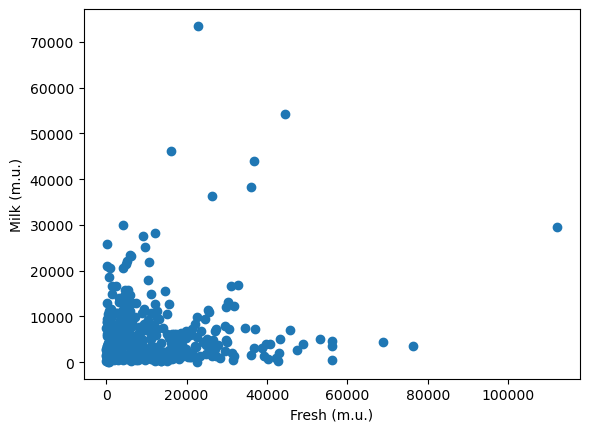

In [5]:
plt.scatter(df.Fresh, df.Milk)
plt.xlabel('Fresh (m.u.)')
plt.ylabel('Milk (m.u.)')

## Unsupervise classification 

### Data preparation 



In [7]:
# Drop categorical variables 
X = df.drop(columns=['Channel', 'Region'])

In [8]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


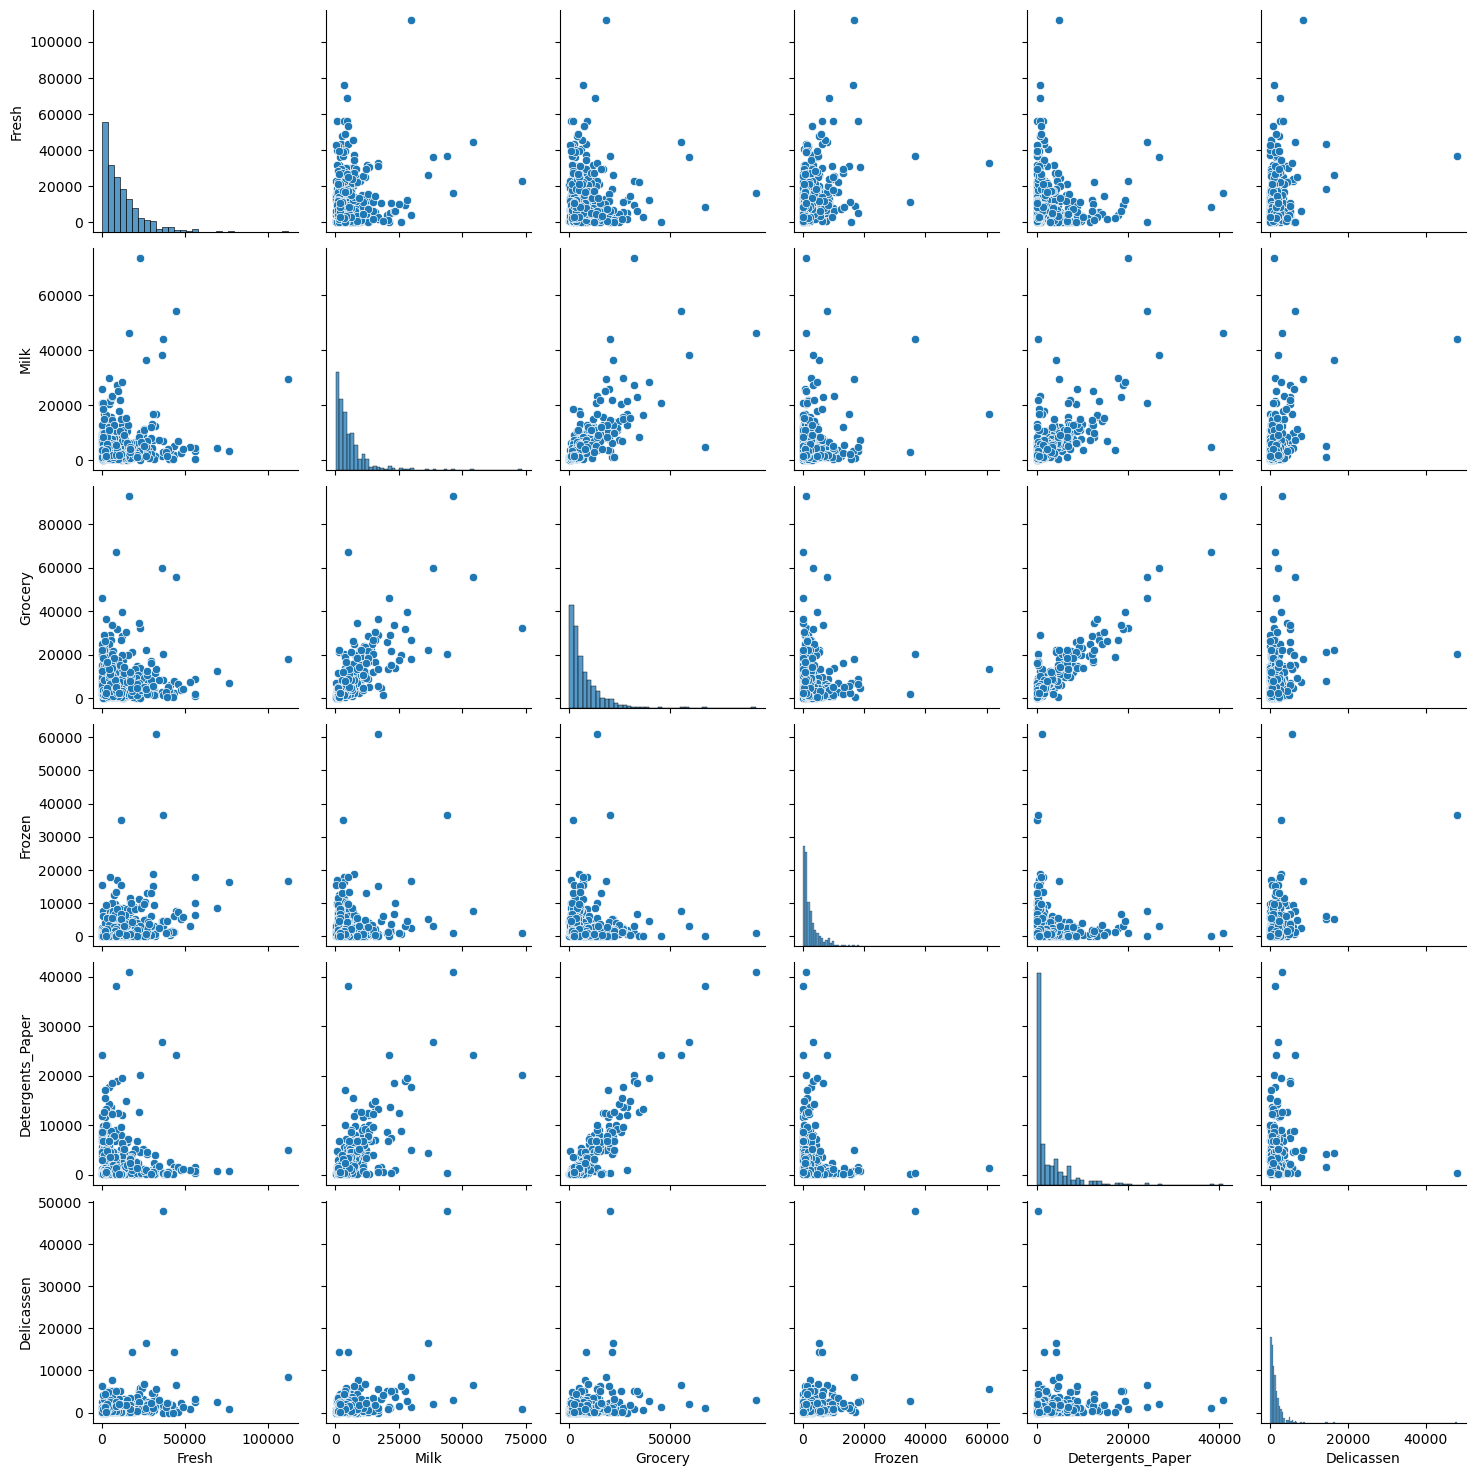

In [9]:
sns.pairplot(X,palette='dark')

### Clustering

In [86]:
epsilon = 1000
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = dbscan.labels_

<Axes: >

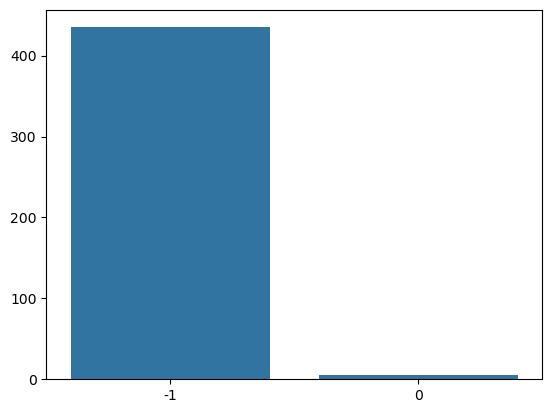

In [87]:
unique_labels, data_counts = np.unique(labels, return_counts=True)
sns.barplot(x=unique_labels, y=data_counts)

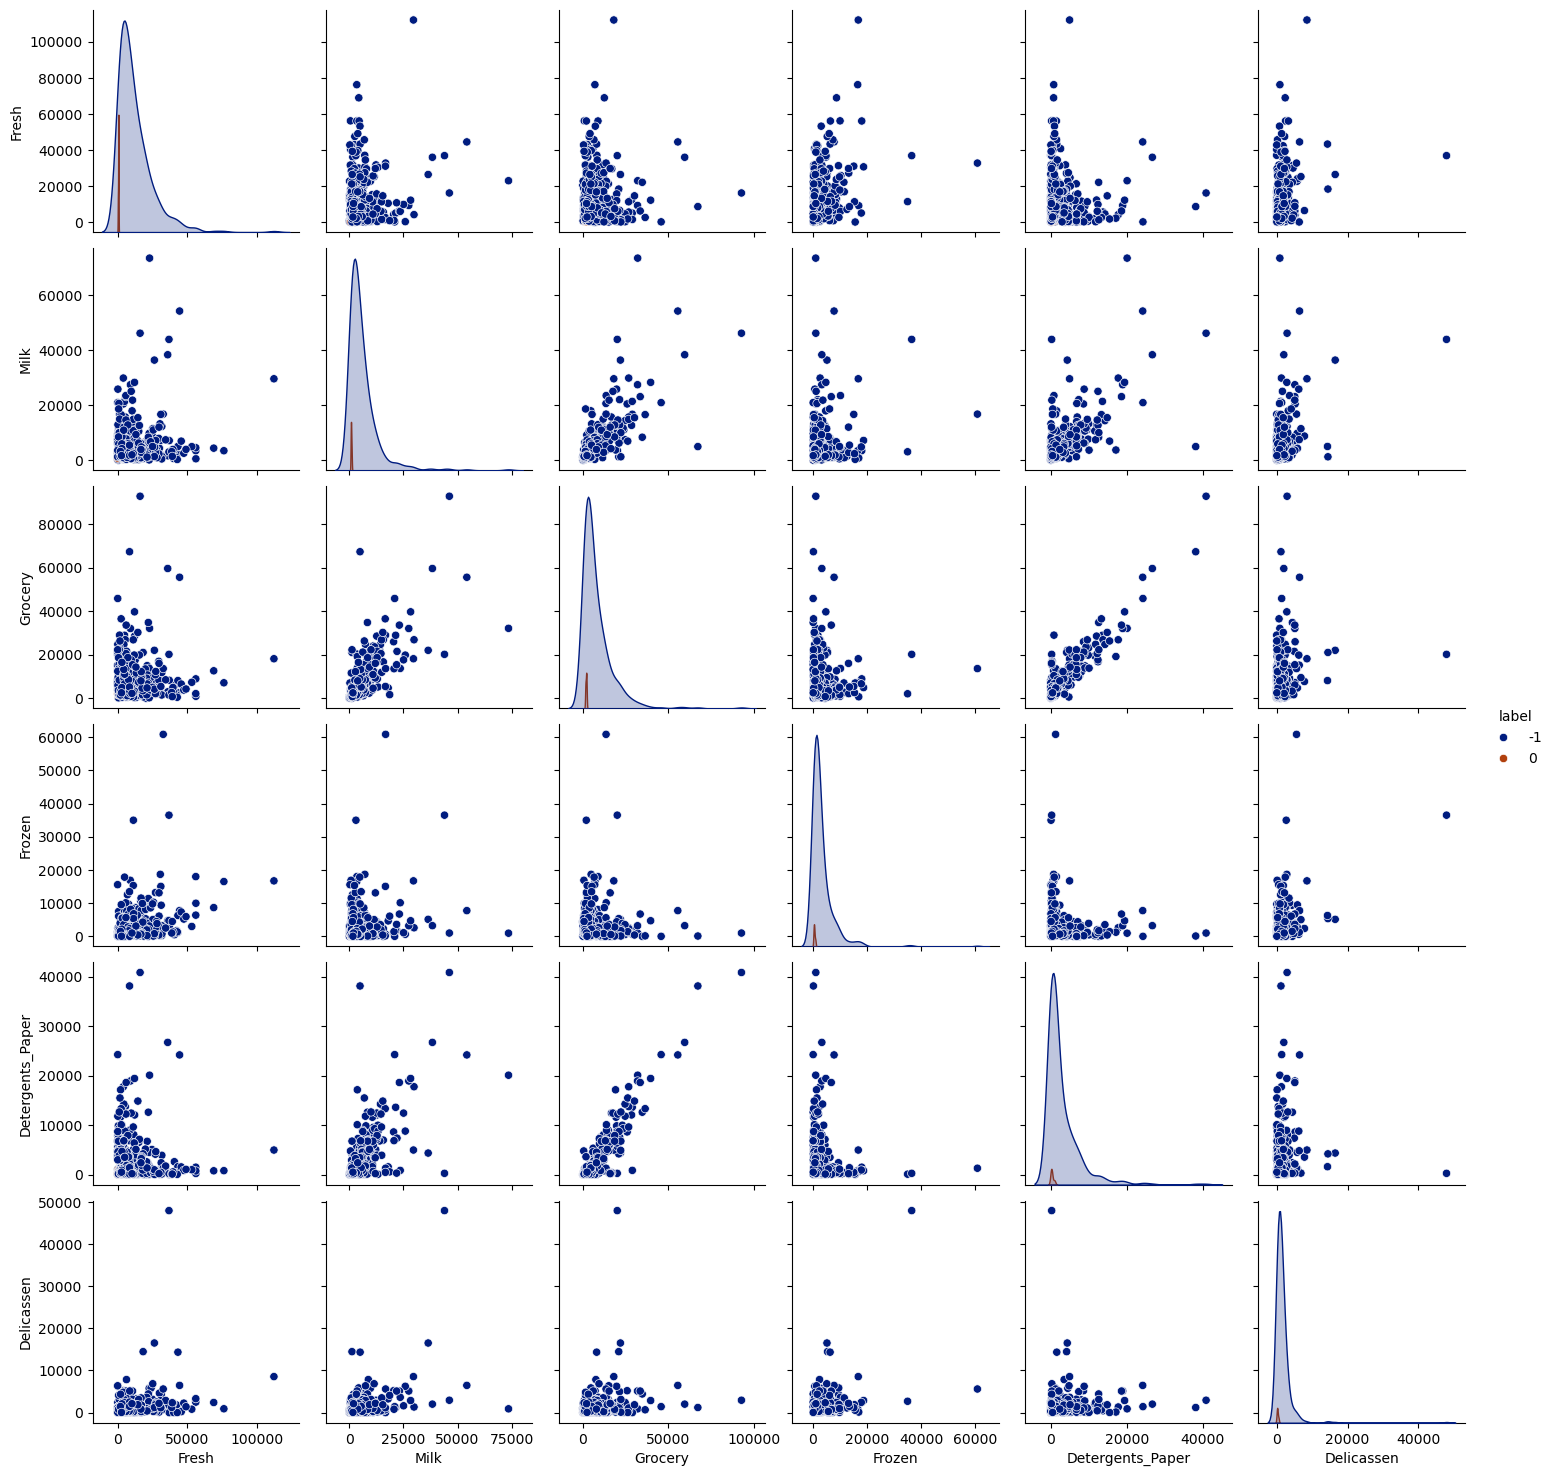

In [88]:
X_labeled = X.copy()
X_labeled['label'] = dbscan.labels_
sns.pairplot(X_labeled, hue='label',palette='dark')

## Revision

### Data scaling

- Standarize ~ center and scale 


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#X_z =   scaler.fit_transform(X)
X_z = pd.DataFrame(data=scaler.fit_transform(X),  index=X.index, columns=X.columns)

In [29]:
X_z

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.05,0.52,-0.04,-0.59,-0.04,-0.07
1,-0.39,0.54,0.17,-0.27,0.09,0.09
2,-0.45,0.41,-0.03,-0.14,0.13,2.24
3,0.10,-0.62,-0.39,0.69,-0.50,0.09
4,0.84,-0.05,-0.08,0.17,-0.23,1.30
...,...,...,...,...,...,...
435,1.40,0.85,0.85,2.08,-0.57,0.24
436,2.16,-0.59,-0.76,0.30,-0.59,0.29
437,0.20,1.31,2.35,-0.54,2.51,0.12
438,-0.14,-0.52,-0.60,-0.42,-0.57,0.21


### Parameters

**`eps`**: Define the maximum distance between two points for one to be considered as a neighbor of the other

One way to determine the appropriate value of `eps` is to use a k-distance plot, which plots the distance to the k-th nearest neighbor for each point in the dataset. The value of epsilon can be chosen as the distance corresponding to a knee or elbow point in the plot.

In [31]:
## Knee point
# The NearestNeighbors algorithm to compute the pairwise distances between all points in the data 
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(n_neighbors=2) # pairwise 2 
nearest = model.fit(X_z)
distances, indices = nearest.kneighbors(X_z)

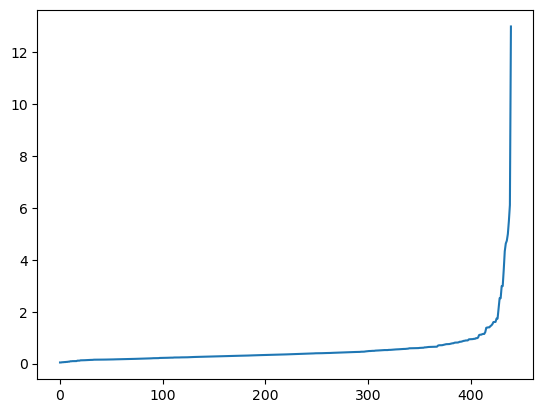

In [23]:
# sorting values
distances = np.sort(distances[:,1])
# plot
plt.plot(distances)

In [30]:
## Install knee finder
#pip install kneed
#!conda install -c conda-forge kneed -y

from kneed import KneeLocator
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_epsilon = distances[kneedle.knee]
print("Epsilon: ", optimal_epsilon)

Epsilon:  1.6070889053161403


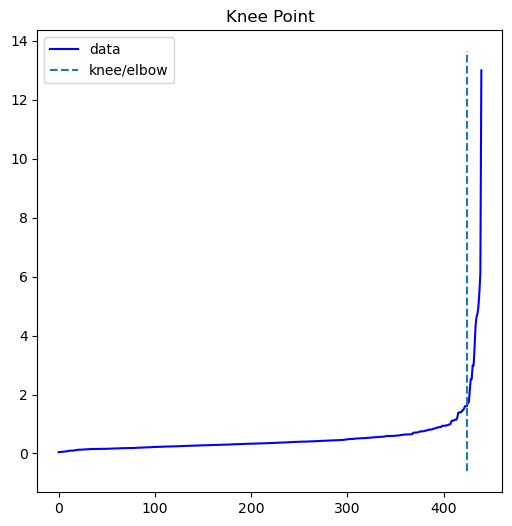

In [25]:
kneedle.plot_knee()

### Clustering

In [75]:
dbscan = DBSCAN(eps=optimal_epsilon, min_samples=12).fit(X_z)
labels = dbscan.labels_

<Axes: >

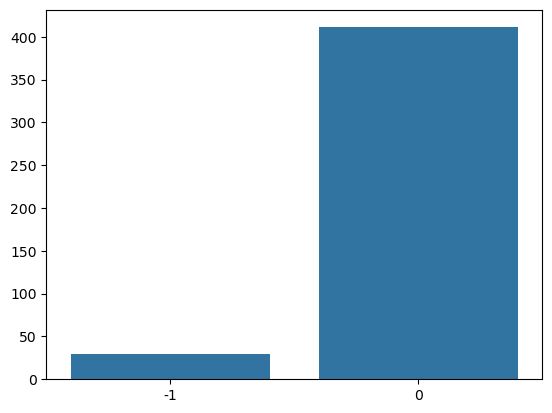

In [76]:
unique_labels, data_counts = np.unique(labels, return_counts=True)
sns.barplot(x=unique_labels, y=data_counts)

In [72]:
X_out = X.copy()
X_out['label'] = dbscan.labels_
X_out.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


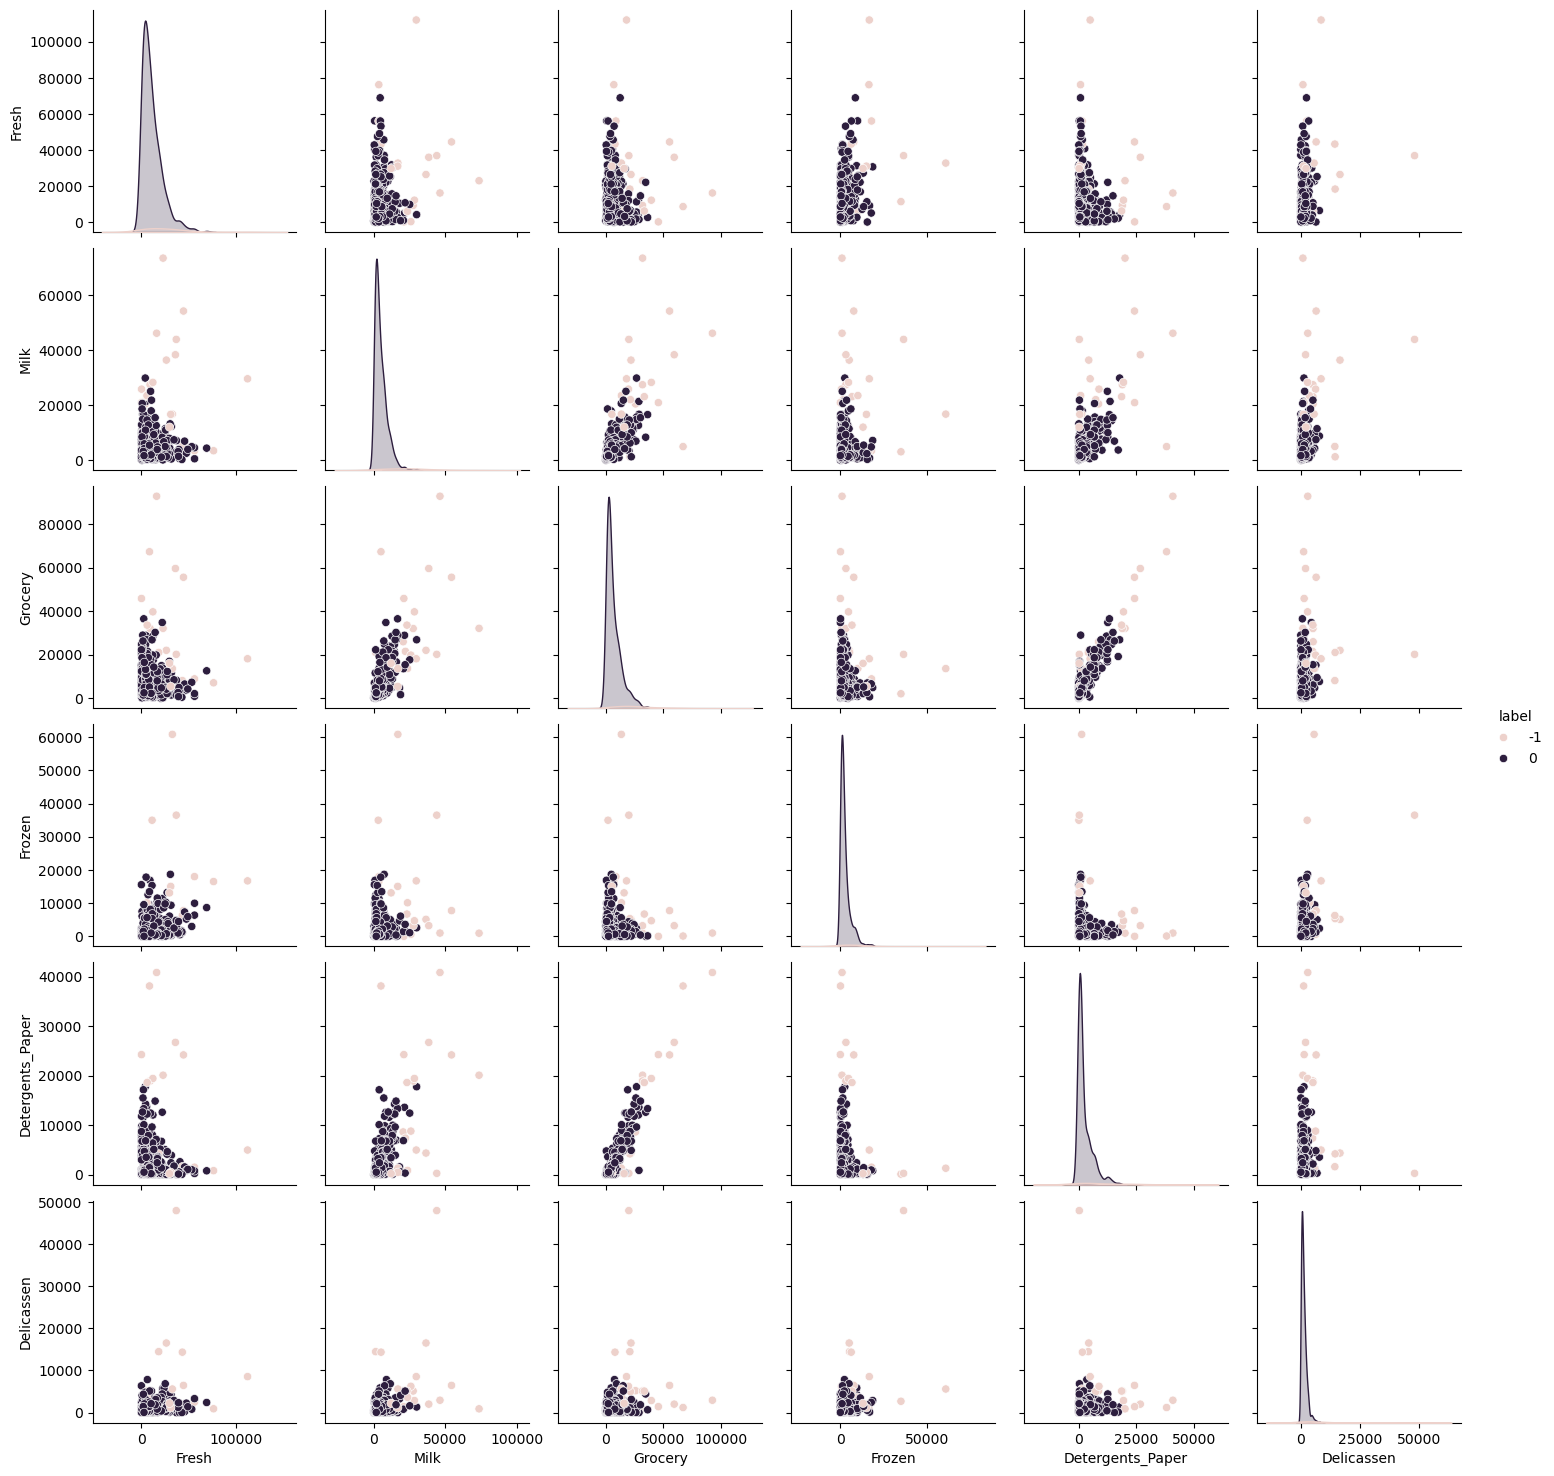

In [73]:
sns.pairplot(X_out, hue='label')

In [57]:
X_mean = X_out.groupby(['label'], as_index=False).mean()
X_mean

,label,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-1,25912.97,22903.41,26671.76,10052.14,10619.66,6292.76
1,0,11018.63,4589.19,6630.37,2579.41,2335.49,1188.45


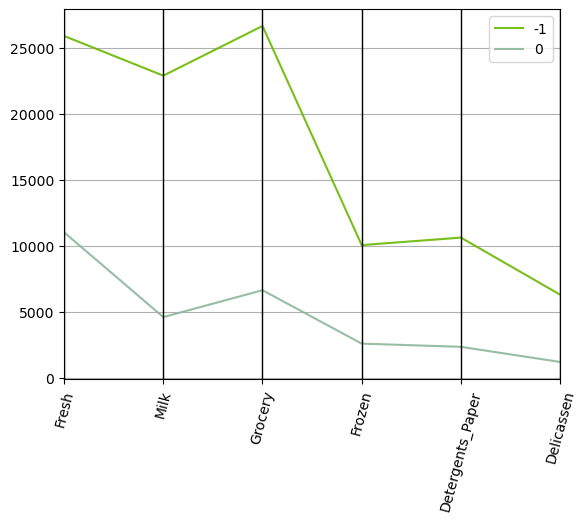

In [90]:
pd.plotting.parallel_coordinates(X_mean,'label',alpha=.9,sort_labels=True)
plt.xticks(rotation=75)
plt.show()